In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
data= pd.read_excel("Sales_data (1).xlsx")

In [3]:
data

,Order ID,Order Line No,Date Shipped,Item ID,Qty Ordered,Line Status,Order Date,Due Date,Customer ID,Qty Shipped,UM,Qty Returned,Shipment ID,Unit Price,Total Price,Qty Invoiced,Ship Warehouse,Ship To,Order Release Date,Ship Code
0,A0001,1,2024-01-08,I0001,5,Complete,2023-11-29,2023-11-29,10337,5.0,C5,0,SH0001,35.65,178.25,5.0,LPI,1,2023-11-29 08:15:34.917,DVBL
1,A0002,9,2024-01-08,I0002,4,Complete,2023-12-05,2023-12-05,10337,4.0,C5,0,SH0002,158.10,632.40,4.0,LPI,1,2023-12-05 08:16:13.473,DVBL
2,A0003,3,2024-01-11,I0003,20,Complete,2023-12-13,2023-12-13,10352,20.0,C5,0,SH0003,87.85,1757.00,20.0,LPI,1,2023-12-13 08:15:14.177,FMDO
3,A0004,7,2024-01-11,I0002,10,Complete,2023-12-13,2023-12-13,10343,10.0,C5,0,SH0004,158.10,1581.00,10.0,LPI,1,2023-12-13 08:15:14.417,FMDO
4,A0004,8,2024-01-10,I0004,3,Complete,2023-12-13,2023-12-13,10343,3.0,C12,0,SH0005,302.04,906.12,3.0,LPI,1,2023-12-13 08:15:14.423,FMDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23291,A12870,1,2024-12-31,I0026,20,Complete,2024-12-31,2024-12-31,12594,20.0,C5,0,SH22444,30.40,608.00,20.0,LPI,1,NaT,OWPD
23292,A12871,3,2024-12-31,I0092,10,Complete,2024-12-31,2024-12-31,11264,10.0,C10,0,SH22445,129.60,1296.00,10.0,DWN,1,NaT,OWPD
23293,A12872,1,2024-12-31,I0026,25,Complete,2024-12-31,2024-12-31,12025,25.0,C5,0,SH22446,25.75,643.75,25.0,LPI,1,NaT,OWPD
23294,A12873,1,2024-12-31,I0026,50,Complete,2024-12-31,2024-12-31,11424,44.0,C5,0,SH22447,27.85,1225.40,44.0,MSL,1,NaT,OWPD


In [ ]:
##Understanding Data and Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            23296 non-null  object        
 1   Order Line No       23296 non-null  int64         
 2   Date Shipped        23296 non-null  datetime64[ns]
 3   Item ID             23296 non-null  object        
 4   Qty Ordered         23296 non-null  int64         
 5   Line Status         23296 non-null  object        
 6   Order Date          23296 non-null  datetime64[ns]
 7   Due Date            23296 non-null  datetime64[ns]
 8   Customer ID         23296 non-null  int64         
 9   Qty Shipped         23296 non-null  float64       
 10  UM                  23296 non-null  object        
 11  Qty Returned        23296 non-null  int64         
 12  Shipment ID         23296 non-null  object        
 13  Unit Price          23296 non-null  float64   

In [5]:
data['Customer ID'] = data['Customer ID'].astype(object)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            23296 non-null  object        
 1   Order Line No       23296 non-null  int64         
 2   Date Shipped        23296 non-null  datetime64[ns]
 3   Item ID             23296 non-null  object        
 4   Qty Ordered         23296 non-null  int64         
 5   Line Status         23296 non-null  object        
 6   Order Date          23296 non-null  datetime64[ns]
 7   Due Date            23296 non-null  datetime64[ns]
 8   Customer ID         23296 non-null  object        
 9   Qty Shipped         23296 non-null  float64       
 10  UM                  23296 non-null  object        
 11  Qty Returned        23296 non-null  int64         
 12  Shipment ID         23296 non-null  object        
 13  Unit Price          23296 non-null  float64   

In [7]:
data.isnull().sum()

Order ID                  0
Order Line No             0
Date Shipped              0
Item ID                   0
Qty Ordered               0
Line Status               0
Order Date                0
Due Date                  0
Customer ID               0
Qty Shipped               0
UM                        0
Qty Returned              0
Shipment ID               0
Unit Price                0
Total Price               0
Qty Invoiced              0
Ship Warehouse            0
Ship To                   0
Order Release Date    20665
Ship Code                 1
dtype: int64

In [8]:
data.describe()

,Order Line No,Date Shipped,Qty Ordered,Order Date,Due Date,Qty Shipped,Qty Returned,Unit Price,Total Price,Qty Invoiced,Ship To,Order Release Date
count,23296.000000,23296,23296.000000,23296,23296,23296.000000,23296.000000,23296.000000,23296.000000,23296.000000,23296.0,2631
mean,4.232701,2024-06-23 21:20:33.148952576,11.483388,2024-05-26 11:34:54.230769152,2024-06-14 23:32:48.131867904,9.610269,0.000043,182.990438,1055.689572,9.610312,1.0,2024-06-12 12:19:15.934236416
min,1.000000,2024-01-02 00:00:00,1.000000,2022-12-19 00:00:00,2023-11-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.083333,1.0,2023-11-29 08:15:34.917000
25%,1.000000,2024-03-26 00:00:00,2.000000,2024-02-27 00:00:00,2024-03-19 00:00:00,2.000000,0.000000,38.850000,251.200000,2.000000,1.0,2024-03-14 08:15:19.998499840
50%,1.000000,2024-06-20 00:00:00,5.000000,2024-05-29 00:00:00,2024-06-13 00:00:00,4.000000,0.000000,156.900000,542.160000,4.000000,1.0,2024-06-14 08:15:09.569999872
75%,3.000000,2024-09-17 00:00:00,10.000000,2024-08-28 00:00:00,2024-09-10 00:00:00,10.000000,0.000000,256.440000,1262.400000,10.000000,1.0,2024-09-05 08:16:26.592000
max,286.000000,2024-12-31 00:00:00,400.000000,2024-12-31 00:00:00,2025-02-04 00:00:00,380.000000,1.000000,1564.560000,39830.000000,380.000000,1.0,2024-12-31 08:15:14.860000
std,13.801048,NaN,23.953561,NaN,NaN,16.891751,0.006552,176.964582,1588.775256,16.891728,0.0,NaN


In [9]:
data[data["Ship Code"].isnull()]

,Order ID,Order Line No,Date Shipped,Item ID,Qty Ordered,Line Status,Order Date,Due Date,Customer ID,Qty Shipped,UM,Qty Returned,Shipment ID,Unit Price,Total Price,Qty Invoiced,Ship Warehouse,Ship To,Order Release Date,Ship Code
3762,A1383,1,2024-03-22 11:50:38,I0005,1,Complete,2023-12-11,2024-01-04,14390,0.2,C5,0,SH3624,159.05,31.81,0.2,DWN,1,NaT,NaN


In [10]:
data[data['Customer ID']==14390]

,Order ID,Order Line No,Date Shipped,Item ID,Qty Ordered,Line Status,Order Date,Due Date,Customer ID,Qty Shipped,UM,Qty Returned,Shipment ID,Unit Price,Total Price,Qty Invoiced,Ship Warehouse,Ship To,Order Release Date,Ship Code
3761,A1383,1,2024-01-29 00:00:00,I0005,1,Complete,2023-12-11,2024-01-04,14390,0.8,C5,0,SH3623,159.05,127.24,0.8,DWN,1,NaT,TGPW
3762,A1383,1,2024-03-22 11:50:38,I0005,1,Complete,2023-12-11,2024-01-04,14390,0.2,C5,0,SH3624,159.05,31.81,0.2,DWN,1,NaT,NaN
20317,A10819,1,2024-11-05 00:00:00,I0004,1,Complete,2024-10-08,2024-10-14,14390,1.0,C12,0,SH19562,345.00,345.00,1.0,LPI,1,NaT,TGPW
20828,A11141,1,2024-12-09 00:00:00,I0010,1,Complete,2024-10-17,2024-10-23,14390,1.0,C24,0,SH20061,728.16,728.16,1.0,DWN,1,NaT,TGPW
21615,A11679,1,2024-12-16 00:00:00,I0004,1,Complete,2024-11-05,2024-12-11,14390,1.0,C12,0,SH20821,345.00,345.00,1.0,LPI,1,NaT,TGPW


In [11]:
data['Ship Code'].fillna('TGPW', inplace=True)
##Customer 14390 always prefers ship code TGPW

C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\1275362070.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Ship Code'].fillna('TGPW', inplace=True)


In [12]:
data['Shipping Time'] = (data['Date Shipped'] - data['Order Date']).dt.days
##The time taken to deliver

In [13]:
data['Order Release Date'] = data['Order Release Date'].dt.date
##Missing value

In [14]:
(data[['Qty Ordered', 'Qty Invoiced', 'Unit Price', 'Shipping Time']].describe(percentiles=[0.01, 0.05, 0.75, 0.95, 0.99]))

,Qty Ordered,Qty Invoiced,Unit Price,Shipping Time
count,23296.000000,23296.000000,23296.000000,23296.000000
mean,11.483388,9.610312,182.990438,28.406679
std,23.953561,16.891728,176.964582,63.368985
min,1.000000,0.083333,0.000000,-2.000000
1%,1.000000,1.000000,22.050000,0.000000
5%,1.000000,1.000000,23.312500,0.000000
50%,5.000000,4.000000,156.900000,6.000000
75%,10.000000,10.000000,256.440000,21.000000
95%,40.000000,36.000000,407.640000,160.000000
99%,100.000000,70.000000,765.840000,336.000000


In [15]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Release Date'] = pd.to_datetime(data['Order Release Date'])
data['Date Shipped'] = pd.to_datetime(data['Date Shipped'])

In [16]:
df= data

In [17]:
import pandas as pd

# Convert to datetime

# Calculate the difference (Ship Date - Order Release Date) for existing values
df["Release_to_Ship_Gap"] = (df["Date Shipped"] - df["Order Release Date"]).dt.days

# Compute median gap per Ship Warehouse
median_gap_per_warehouse = df.groupby("Ship Warehouse")["Release_to_Ship_Gap"].transform("median")

# Fill missing Order Release Date using Ship Date - median gap for that warehouse
df["Order Release Date"].fillna(df["Date Shipped"] - pd.to_timedelta(median_gap_per_warehouse, unit="D"), inplace=True)

# If still missing, use overall median gap
overall_median_gap = df["Release_to_Ship_Gap"].median()
df["Order Release Date"].fillna(df["Date Shipped"] - pd.to_timedelta(overall_median_gap, unit="D"), inplace=True)

# Drop helper column
df.drop(columns=["Release_to_Ship_Gap"], inplace=True)

# Check if any missing values remain
print("Remaining missing 'Order Release Date':", df["Order Release Date"].isnull().sum())


Remaining missing 'Order Release Date': 0


C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\2616550691.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Order Release Date"].fillna(df["Date Shipped"] - pd.to_timedelta(median_gap_per_warehouse, unit="D"), inplace=True)
C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\2616550691.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

In [18]:
data.isnull().sum()

Order ID              0
Order Line No         0
Date Shipped          0
Item ID               0
Qty Ordered           0
Line Status           0
Order Date            0
Due Date              0
Customer ID           0
Qty Shipped           0
UM                    0
Qty Returned          0
Shipment ID           0
Unit Price            0
Total Price           0
Qty Invoiced          0
Ship Warehouse        0
Ship To               0
Order Release Date    0
Ship Code             0
Shipping Time         0
dtype: int64

In [19]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Release Date'] = pd.to_datetime(data['Order Release Date'])
data['Date Shipped'] = pd.to_datetime(data['Date Shipped'])



In [20]:
df = df[df["Shipping Time"] != -2]


In [21]:
# Regular Orders (Qty Ordered ≤ 22)
regular_orders = df[df["Qty Ordered"] <= 22]

# Medium Orders (22 < Qty Ordered ≤ 100)
medium_orders = df[(df["Qty Ordered"] > 22) & (df["Qty Ordered"] <= 100)]

# Bulk Orders (Qty Ordered > 100)
bulk_orders = df[df["Qty Ordered"] > 100]

# Print sizes
print(f"Regular Orders: {regular_orders.shape[0]} rows")
print(f"Medium Orders: {medium_orders.shape[0]} rows")
print(f"Bulk Orders: {bulk_orders.shape[0]} rows")


Regular Orders: 20668 rows
Medium Orders: 2416 rows
Bulk Orders: 211 rows


In [22]:
# Calculate revenue for each order category
regular_revenue = regular_orders["Total Price"].sum()
medium_revenue = medium_orders["Total Price"].sum()
bulk_revenue = bulk_orders["Total Price"].sum()

# Print revenue breakdown
print(f"Regular Orders Revenue: ${regular_revenue:,.2f}")
print(f"Medium Orders Revenue: ${medium_revenue:,.2f}")
print(f"Bulk Orders Revenue: ${bulk_revenue:,.2f}")


Regular Orders Revenue: $17,421,086.98
Medium Orders Revenue: $6,051,143.34
Bulk Orders Revenue: $1,120,289.55


In [23]:
# Calculate total number of orders
total_orders = len(df)

# Count orders in each category
regular_orders = len(df[df["Qty Ordered"] <= 22])
medium_orders = len(df[(df["Qty Ordered"] > 22) & (df["Qty Ordered"] <= 100)])
bulk_orders = len(df[df["Qty Ordered"] > 100])

# Print order percentage breakdown
print(f"Regular Orders: {regular_orders / total_orders:.2%}")
print(f"Medium Orders: {medium_orders / total_orders:.2%}")
print(f"Bulk Orders: {bulk_orders / total_orders:.2%}")


Regular Orders: 88.72%
Medium Orders: 10.37%
Bulk Orders: 0.91%


In [24]:
# Define order segments properly as DataFrames
regular_orders = df[df["Qty Ordered"] <= 22]
medium_orders = df[(df["Qty Ordered"] > 22) & (df["Qty Ordered"] <= 100)]
bulk_orders = df[df["Qty Ordered"] > 100]

# Calculate average shipping time for each order category
avg_shipping_regular = regular_orders["Shipping Time"].mean()
avg_shipping_medium = medium_orders["Shipping Time"].mean()
avg_shipping_bulk = bulk_orders["Shipping Time"].mean()

# Print average shipping time breakdown
print(f"Avg Shipping Time - Regular: {avg_shipping_regular:.2f} days")
print(f"Avg Shipping Time - Medium: {avg_shipping_medium:.2f} days")
print(f"Avg Shipping Time - Bulk: {avg_shipping_bulk:.2f} days")


Avg Shipping Time - Regular: 26.87 days
Avg Shipping Time - Medium: 38.93 days
Avg Shipping Time - Bulk: 58.77 days


In [25]:
##Monthly Sales Trends by Order Type


C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\2283940024.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convert to datetime format
C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\2283940024.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Type'] = df['Qty Ordered'].apply(lambda x: 'Regular' if x <= 22 else ('Medium' if x <= 100 else 'Bulk'))


<Figure size 3500x1200 with 0 Axes>

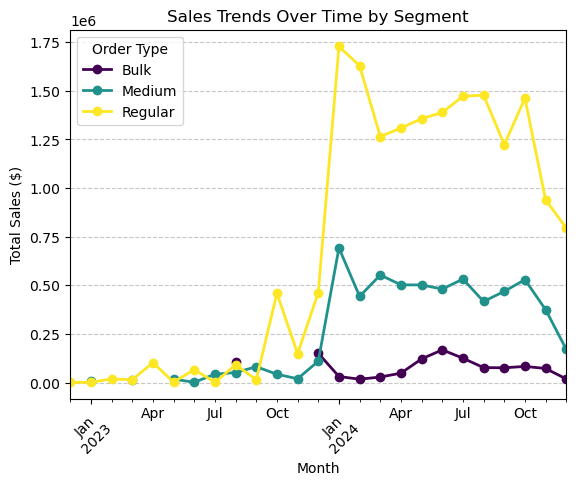

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Ensure your dataframe is named 'df')
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convert to datetime format

# Create segmentation based on order quantity
df['Order Type'] = df['Qty Ordered'].apply(lambda x: 'Regular' if x <= 22 else ('Medium' if x <= 100 else 'Bulk'))

# Aggregate sales over time for each segment
sales_trends = df.groupby([df['Order Date'].dt.to_period('M'), 'Order Type'])['Total Price'].sum().unstack()

# Plot sales trends
plt.figure(figsize=(35, 12))
sales_trends.plot(kind='line', marker='o', linewidth=2, colormap='viridis')

plt.title('Sales Trends Over Time by Segment')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.legend(title='Order Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.show()


In [27]:
##Overall Insights

In [123]:
def generate_insights(df_segment, segment_name):
    monthly_sales = df_segment.groupby(df_segment["Order Date"].dt.to_period("M"))["Total Price"].sum().reset_index()
    top_products = df_segment.groupby("Item ID")["Total Price"].sum().reset_index().sort_values(by="Total Price", ascending=False)
    top_customers = df_segment.groupby("Customer ID")["Total Price"].sum().reset_index().sort_values(by="Total Price", ascending=False)
    returns_analysis = df_segment.groupby("Item ID")["Qty Returned"].sum().reset_index().sort_values(by="Qty Returned", ascending=False)

    insights = {
        "Sales Trends": f"Sales peaked in {monthly_sales.iloc[-1]['Order Date']} with ${monthly_sales.iloc[-1]['Total Price']:.2f} revenue.",
        "Top Products": f"Best-selling product: {top_products.iloc[0]['Item ID']} with revenue ${top_products.iloc[0]['Total Price']:.2f}.",
        "Top Customers": f"Highest spending customer: {top_customers.iloc[0]['Customer ID']} with total spend ${top_customers.iloc[0]['Total Price']:.2f}.",
        "Returns": f"Most returned product: {returns_analysis.iloc[0]['Item ID']} with {returns_analysis.iloc[0]['Qty Returned']} returns."
    }

    return f"""
    ### {segment_name} Orders - Business Insights ###

    1. **Sales Trends:**
       - {insights['Sales Trends']}

    2. **Top-Selling Products:**
       - {insights['Top Products']}

    3. **Customer Purchasing Behavior:**
       - {insights['Top Customers']}

    4. **Returns & Logistics:**
       - {insights['Returns']}
    """

# Generate insights for each segmentation
regular_insights = generate_insights(regular_orders, "Regular")
medium_insights = generate_insights(medium_orders, "Medium")
bulk_insights = generate_insights(bulk_orders, "Bulk")

# Print all insights
print(regular_insights)
print(medium_insights)
print(bulk_insights)





    ### Regular Orders - Business Insights ###

    1. **Sales Trends:**
       - Sales peaked in 2024-12 with $794106.58 revenue.

    2. **Top-Selling Products:**
       - Best-selling product: I0016 with revenue $1792938.00.

    3. **Customer Purchasing Behavior:**
       - Highest spending customer: 11469.0 with total spend $710471.53.

    4. **Returns & Logistics:**
       - Most returned product: I0085 with 1 returns.
    

    ### Medium Orders - Business Insights ###

    1. **Sales Trends:**
       - Sales peaked in 2024-12 with $170550.05 revenue.

    2. **Top-Selling Products:**
       - Best-selling product: I0088 with revenue $520043.50.

    3. **Customer Purchasing Behavior:**
       - Highest spending customer: 11469.0 with total spend $835738.90.

    4. **Returns & Logistics:**
       - Most returned product: I0001 with 0 returns.
    

    ### Bulk Orders - Business Insights ###

    1. **Sales Trends:**
       - Sales peaked in 2024-12 with $18348.00 revenue.

 

In [ ]:
##None of the products got returned shows customers are happy with our product, main thing to focus is Logistics.

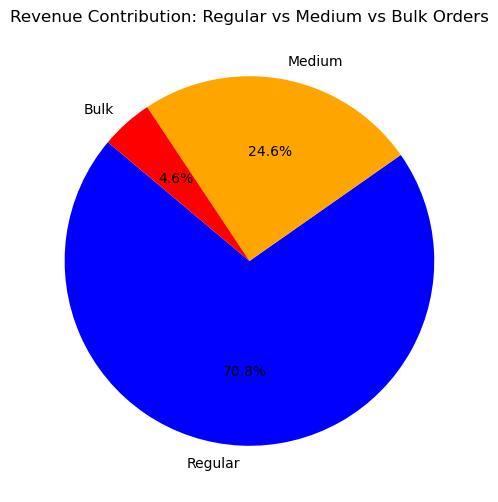

In [28]:
import matplotlib.pyplot as plt

# Calculate total revenue for each order category
revenue_regular = regular_orders["Total Price"].sum()
revenue_medium = medium_orders["Total Price"].sum()
revenue_bulk = bulk_orders["Total Price"].sum()

# Prepare data for the pie chart
order_types = ["Regular", "Medium", "Bulk"]
revenues = [revenue_regular, revenue_medium, revenue_bulk]

# Visualization
plt.figure(figsize=(6,6))
plt.pie(revenues, labels=order_types, autopct="%1.1f%%", 
        colors=["blue", "orange", "red"], startangle=140)

plt.title("Revenue Contribution: Regular vs Medium vs Bulk Orders")
plt.show()


In [29]:
##Monthly Revenue Trend

C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\907633532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Order Date"] = pd.to_datetime(df["Order Date"])
C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\907633532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Order Date"].dt.to_period("M")


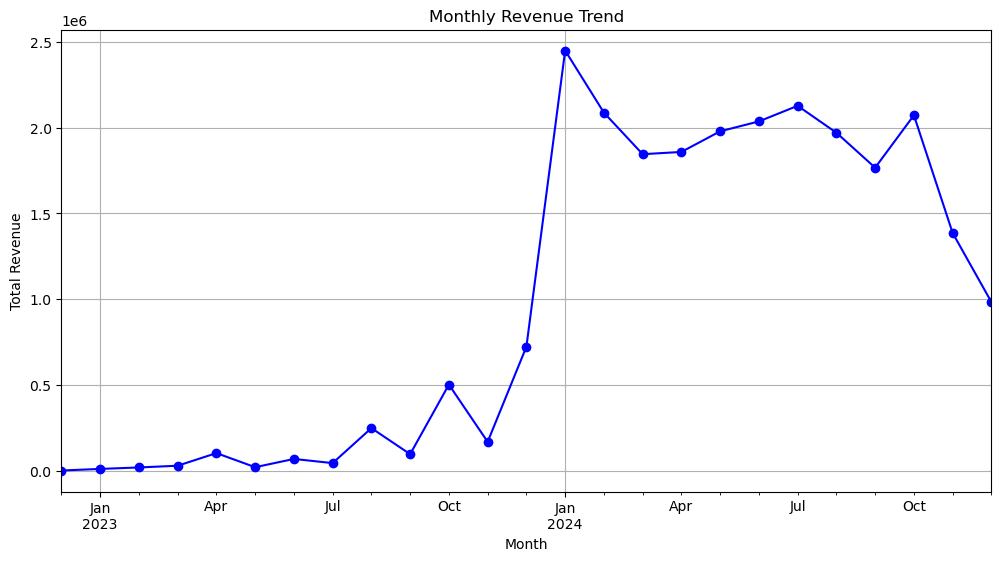

In [30]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Month"] = df["Order Date"].dt.to_period("M")

monthly_revenue = df.groupby("Month")["Total Price"].sum()

# Visualization
plt.figure(figsize=(12,6))
monthly_revenue.plot(kind="line", marker="o", color="blue")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()


In [31]:
##Order quantity and unit price

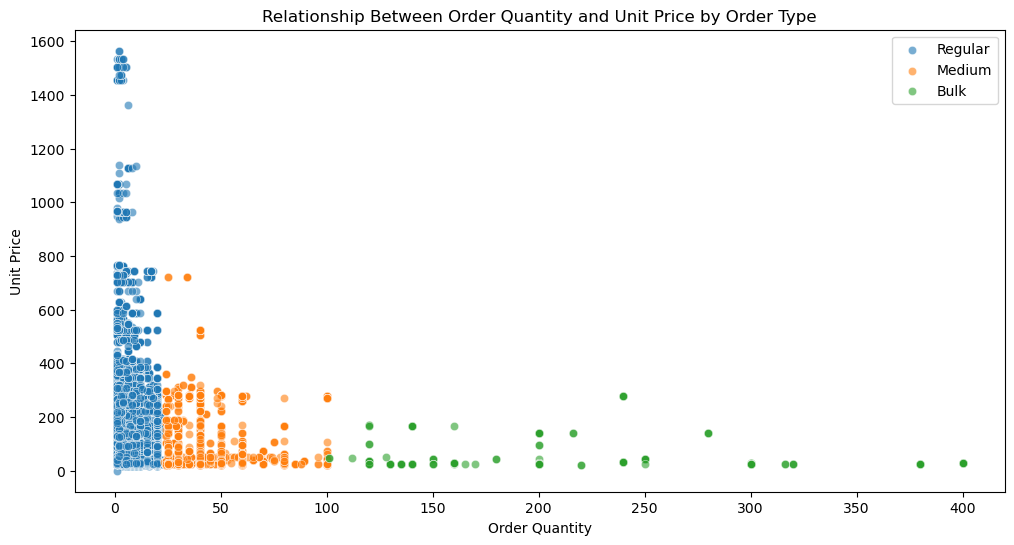

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=regular_orders["Qty Ordered"], y=regular_orders["Unit Price"], label='Regular', alpha=0.6)
sns.scatterplot(x=medium_orders["Qty Ordered"], y=medium_orders["Unit Price"], label='Medium', alpha=0.6)
sns.scatterplot(x=bulk_orders["Qty Ordered"], y=bulk_orders["Unit Price"], label='Bulk', alpha=0.6)
plt.legend()
plt.title("Relationship Between Order Quantity and Unit Price by Order Type")
plt.xlabel("Order Quantity")
plt.ylabel("Unit Price")
plt.show()

In [ ]:
##Optimizing pricing tiers and targeted promotions can drive higher sales volume.

In [33]:
##Top Ordered Product

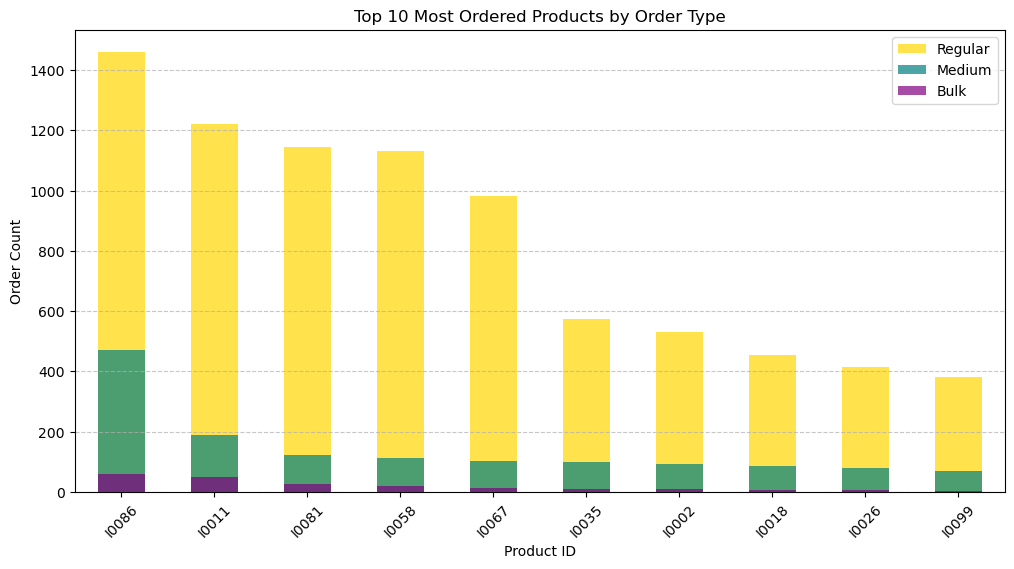

In [34]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Define custom colors for each order type
colors = {"Regular": "gold", "Medium": "teal", "Bulk": "purple"}

# Plot each order type with its corresponding color
regular_orders["Item ID"].value_counts().head(10).plot(kind='bar', color=colors["Regular"], label='Regular', alpha=0.7)
medium_orders["Item ID"].value_counts().head(10).plot(kind='bar', color=colors["Medium"], label='Medium', alpha=0.7)
bulk_orders["Item ID"].value_counts().head(10).plot(kind='bar', color=colors["Bulk"], label='Bulk', alpha=0.7)

# Add legend, labels, and title
plt.legend()
plt.title("Top 10 Most Ordered Products by Order Type")
plt.xlabel("Product ID")
plt.ylabel("Order Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add a light grid for better clarity

# Show the plot
plt.show()


In [ ]:
## Some products have more sales, we can raise discounts in those products to even push sales. optimise our pricing stratergy

In [35]:
##High Value Customers

C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\3368602272.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette="Greens")


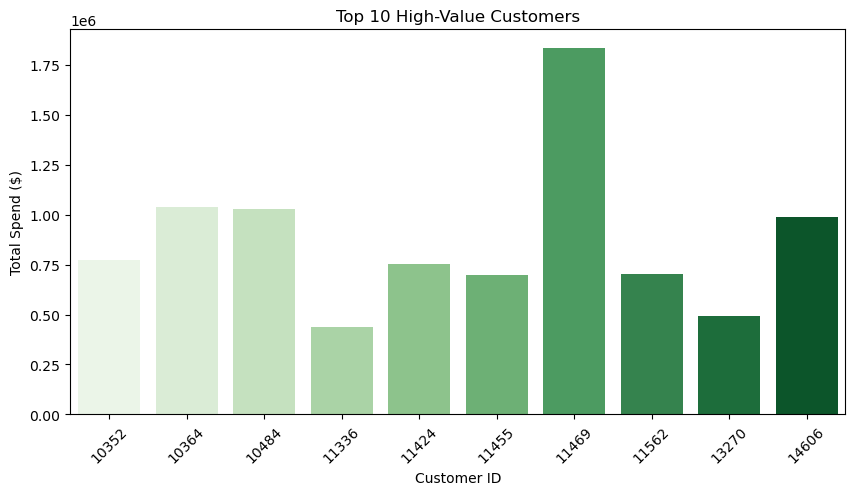

In [36]:
top_customers = df.groupby("Customer ID")["Total Price"].sum().nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="Greens")
plt.xticks(rotation=45)
plt.title("Top 10 High-Value Customers")
plt.ylabel("Total Spend ($)")
plt.show()


In [ ]:
## Making dedicated Loyalty programs for our top customers will encourage to churn 

In [37]:
##Low Value customers

C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\1827520789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_customers.index, y=low_customers.values, palette="Reds")


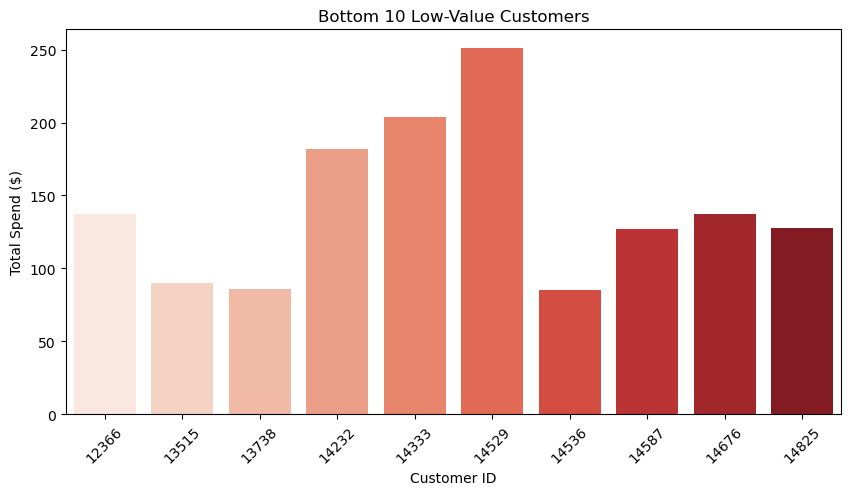

In [38]:
low_customers = df.groupby("Customer ID")["Total Price"].sum().nsmallest(10)

plt.figure(figsize=(10,5))
sns.barplot(x=low_customers.index, y=low_customers.values, palette="Reds")
plt.xticks(rotation=45)
plt.title("Bottom 10 Low-Value Customers")
plt.ylabel("Total Spend ($)")
plt.show()


In [ ]:
## Making dedicated discounts and targetted promortions to least spending customers.

In [39]:
##Customer Churn

C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\521465799.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Customer Type", y="Count", data=customer_types, palette="Blues")


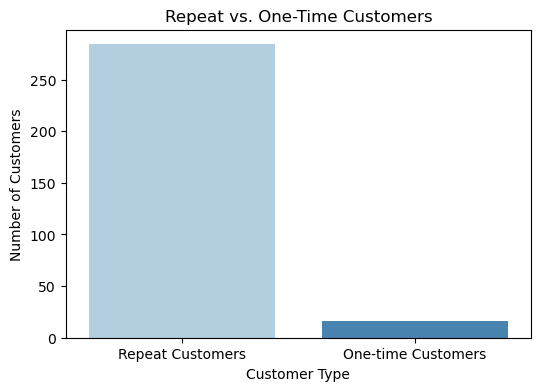

In [40]:
customer_order_counts = df.groupby("Customer ID")["Order Date"].nunique()

# Categorizing customers
repeat_customers = customer_order_counts[customer_order_counts > 1].count()
one_time_customers = customer_order_counts[customer_order_counts == 1].count()

# Creating a dataframe for visualization
customer_types = pd.DataFrame({
    "Customer Type": ["Repeat Customers", "One-time Customers"],
    "Count": [repeat_customers, one_time_customers]
})

# Plot the distribution
plt.figure(figsize=(6,4))
sns.barplot(x="Customer Type", y="Count", data=customer_types, palette="Blues")
plt.title("Repeat vs. One-Time Customers")
plt.ylabel("Number of Customers")
plt.show()

In [ ]:
## The organisation is doing good with the customers, in order to imoprove more, promotions and discounts and improving quality and optimised pricing will help

In [41]:
##Profitable Products

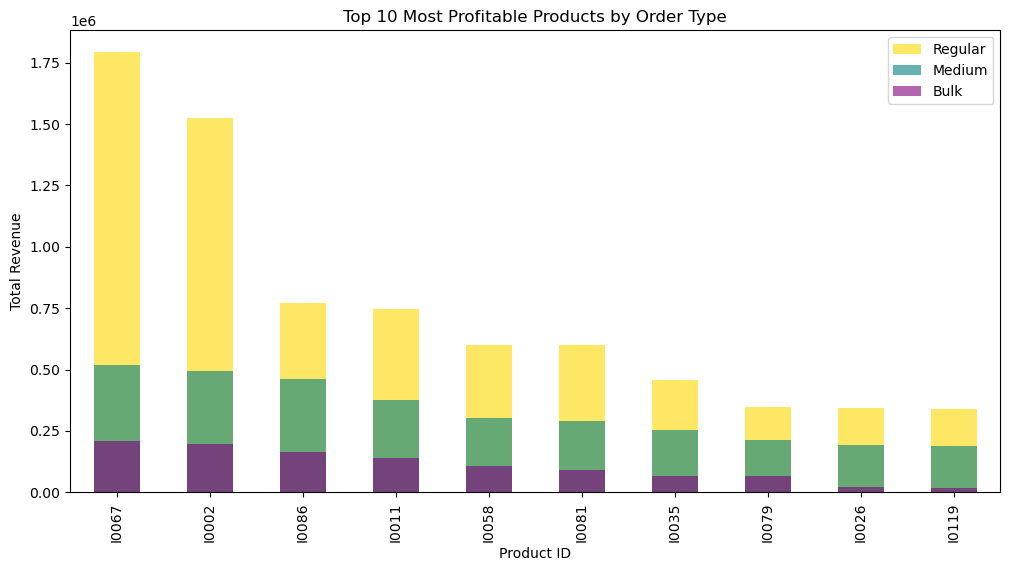

In [42]:
plt.figure(figsize=(12, 6))
colors = {"Regular": "gold", "Medium": "teal", "Bulk": "purple"}
regular_orders.groupby("Item ID")["Total Price"].sum().sort_values(ascending=False).head(10).plot(kind='bar', label='Regular', alpha=0.6, color=colors["Regular"])
medium_orders.groupby("Item ID")["Total Price"].sum().sort_values(ascending=False).head(10).plot(kind='bar', label='Medium', alpha=0.6, color=colors["Medium"])
bulk_orders.groupby("Item ID")["Total Price"].sum().sort_values(ascending=False).head(10).plot(kind='bar', label='Bulk', alpha=0.6, color=colors["Bulk"])

plt.legend()
plt.title("Top 10 Most Profitable Products by Order Type")
plt.xlabel("Product ID")
plt.ylabel("Total Revenue")
plt.show()


In [ ]:
## We have quite difference between 1 and 10, Optimising pricing can help to reduce the margin by improving sales.

In [43]:
##Sales By Warehouse

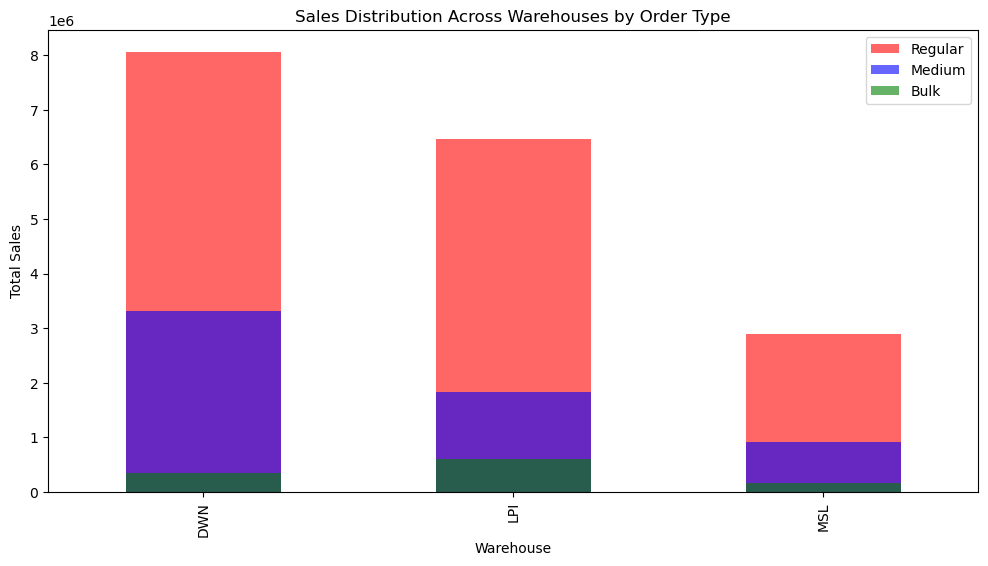

In [44]:
plt.figure(figsize=(12, 6))

# Define colors for each order type
colors = {'Regular': 'red', 'Medium': 'blue', 'Bulk': 'green'}

# Plot each order type with its assigned color
regular_orders.groupby("Ship Warehouse")["Total Price"].sum().plot(
    kind='bar', label='Regular', alpha=0.6, color=colors['Regular'])

medium_orders.groupby("Ship Warehouse")["Total Price"].sum().plot(
    kind='bar', label='Medium', alpha=0.6, color=colors['Medium'])

bulk_orders.groupby("Ship Warehouse")["Total Price"].sum().plot(
    kind='bar', label='Bulk', alpha=0.6, color=colors['Bulk'])

plt.legend()
plt.title("Sales Distribution Across Warehouses by Order Type")
plt.xlabel("Warehouse")
plt.ylabel("Total Sales")
plt.show()


In [ ]:
## Improving Logistics and restocling will help in sales made.

In [45]:
##Order Delivery

C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\3836474961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date Shipped"] = pd.to_datetime(df["Date Shipped"])
C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\3836474961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Due Date"] = pd.to_datetime(df["Due Date"])
C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\3836474961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

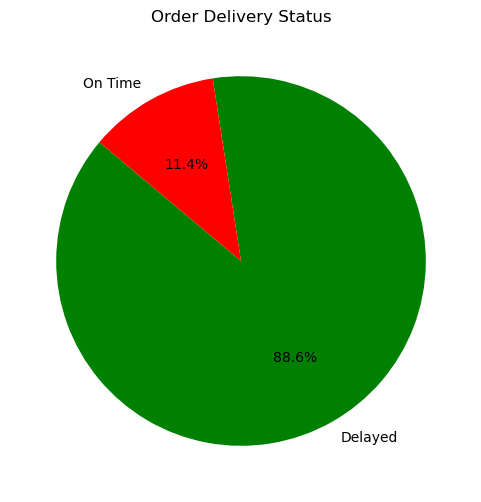

In [46]:
import matplotlib.pyplot as plt

df["Date Shipped"] = pd.to_datetime(df["Date Shipped"])
df["Due Date"] = pd.to_datetime(df["Due Date"])
df["Delay"] = (df["Date Shipped"] - df["Due Date"]).dt.days
df["Delivery Status"] = df["Delay"].apply(lambda x: "On Time" if x <= 0 else "Delayed")
delay_counts = df["Delivery Status"].value_counts()
shipcode_delay = df.groupby(["Ship Code", "Delivery Status"]).size().unstack()
plt.figure(figsize=(6,6))
plt.pie(delay_counts, labels=delay_counts.index, autopct="%1.1f%%", colors=["green", "red"], startangle=140)
plt.title("Order Delivery Status")
plt.show()


In [ ]:
## The Biggest issue with us is our logistics, having more than 80% orders delayed is critical. Investing in better logistics and partnering with effcient logistic parters will help.

<Figure size 1000x600 with 0 Axes>

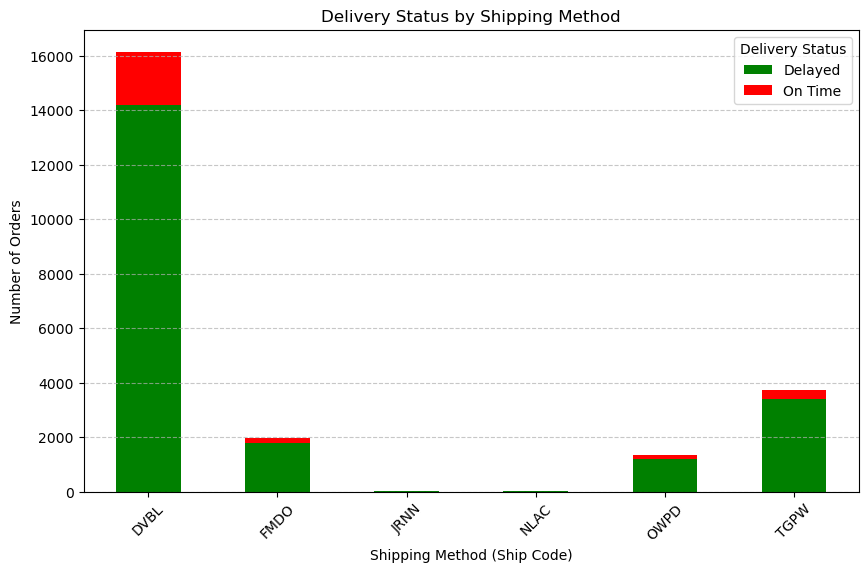

In [47]:
#bar
plt.figure(figsize=(10,6))
shipcode_delay.plot(kind="bar", stacked=True, color=["green", "red"], figsize=(10,6))
plt.title("Delivery Status by Shipping Method")
plt.xlabel("Shipping Method (Ship Code)")
plt.ylabel("Number of Orders")
plt.legend(title="Delivery Status")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [48]:
##Shipping Time Taken by ship code

In [49]:
df["Actual Shipping Time"] = (df["Date Shipped"] - df["Order Date"]).dt.days

C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\2017401364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Actual Shipping Time"] = (df["Date Shipped"] - df["Order Date"]).dt.days


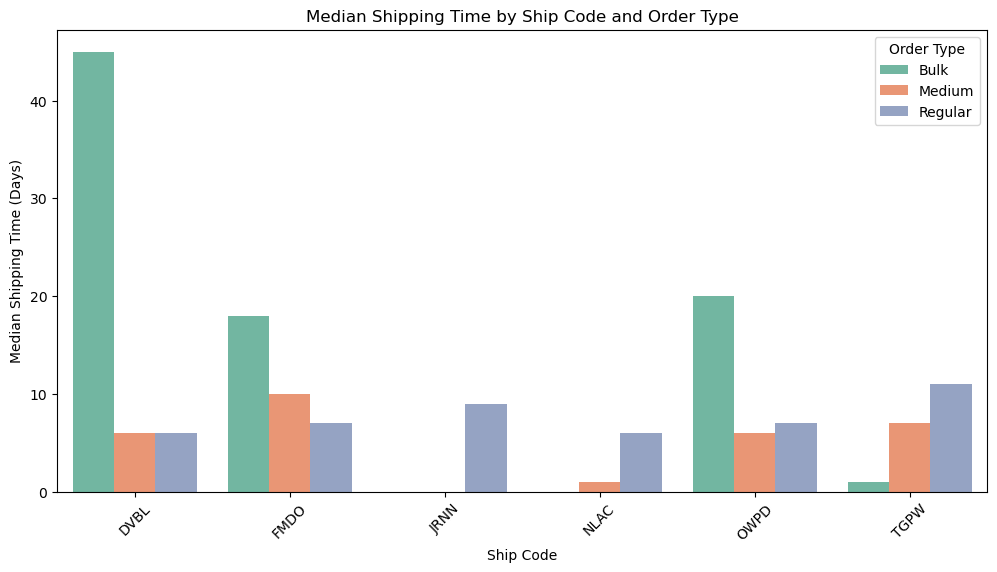

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the median shipping time for each Ship Code and Order Type
median_shipping_time = df.groupby(["Ship Code", "Order Type"])["Actual Shipping Time"].median().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=median_shipping_time, x="Ship Code", y="Actual Shipping Time", hue="Order Type", palette="Set2")  # Using median values
plt.xticks(rotation=45)
plt.title("Median Shipping Time by Ship Code and Order Type")
plt.xlabel("Ship Code")
plt.ylabel("Median Shipping Time (Days)")
plt.legend(title="Order Type")  # Add legend for clarity
plt.show()


In [ ]:
## Bulk order handling is where we are lacking, improving logistics has ability to handle bulk orders is required

In [51]:
##Warehouse Processing

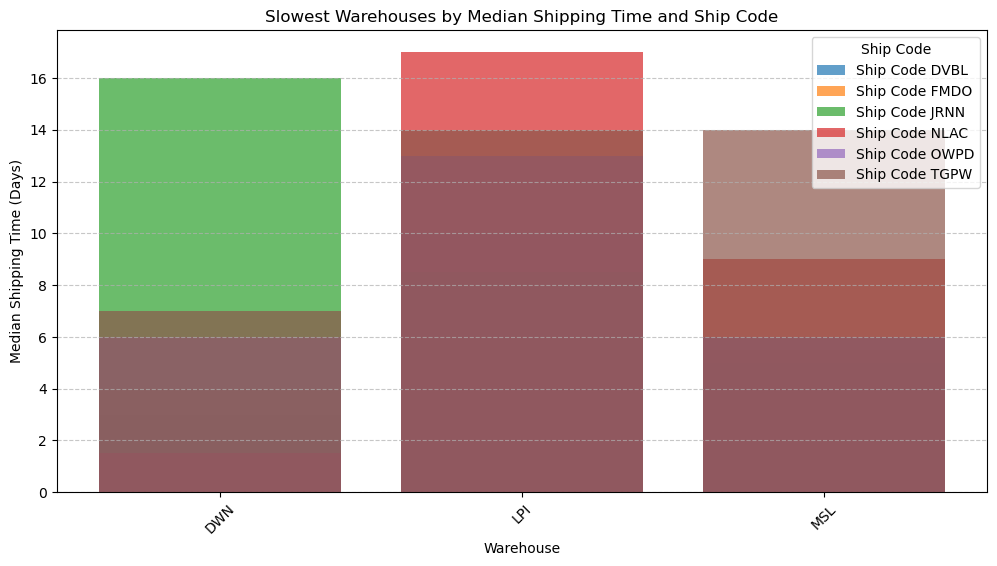

In [52]:
import matplotlib.pyplot as plt
slowest_products = df.groupby("Item ID")["Shipping Time"].median().sort_values(ascending=False).head(10)
slowest_warehouses = df.groupby(["Ship Warehouse", "Ship Code"])["Shipping Time"].median().reset_index()
plt.figure(figsize=(12, 6))
for ship_code in slowest_warehouses["Ship Code"].unique():
    subset = slowest_warehouses[slowest_warehouses["Ship Code"] == ship_code]
    plt.bar(subset["Ship Warehouse"], subset["Shipping Time"], alpha=0.7, label=f"Ship Code {ship_code}")

plt.title("Slowest Warehouses by Median Shipping Time and Ship Code")
plt.xlabel("Warehouse")
plt.ylabel("Median Shipping Time (Days)")
plt.xticks(rotation=45)
plt.legend(title="Ship Code")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
##LPi has highest median shipping time, logistics needs high focus 

In [53]:
##Discrepancy in orders

In [54]:
# Calculate invoice discrepancies
df['Invoice Discrepancy'] = df['Qty Ordered'] - df['Qty Invoiced']

discrepancies = df[df['Invoice Discrepancy'] != 0][["Order ID", "Item ID", "Ship Warehouse", "Qty Ordered", "Qty Invoiced", "Invoice Discrepancy"]]
print(f"Total discrepancies found: {len(discrepancies)}")
discrepancies.head(10)  # Show top 10 discrepancy records




Total discrepancies found: 2633


C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\1777951043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Invoice Discrepancy'] = df['Qty Ordered'] - df['Qty Invoiced']


,Order ID,Item ID,Ship Warehouse,Qty Ordered,Qty Invoiced,Invoice Discrepancy
19,A0014,I0012,LPI,4,3.0,1.0
97,A0050,I0024,DWN,6,5.0,1.0
98,A0050,I0024,DWN,6,1.0,5.0
115,A0056,I0018,DWN,20,1.0,19.0
116,A0056,I0018,DWN,20,19.0,1.0
117,A0057,I0023,DWN,8,4.0,4.0
118,A0057,I0023,DWN,8,4.0,4.0
140,A0065,I0013,LPI,4,2.0,2.0
219,A0102,I0007,LPI,10,8.0,2.0
220,A0102,I0007,LPI,10,2.0,8.0


In [ ]:
## Address inventory discrepancies  by improving stock management and ensuring adequate warehouse supply to prevent shortages.

C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\502719477.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Ship Warehouse", y="Invoice Discrepancy", data=discrepancies, palette="Reds")


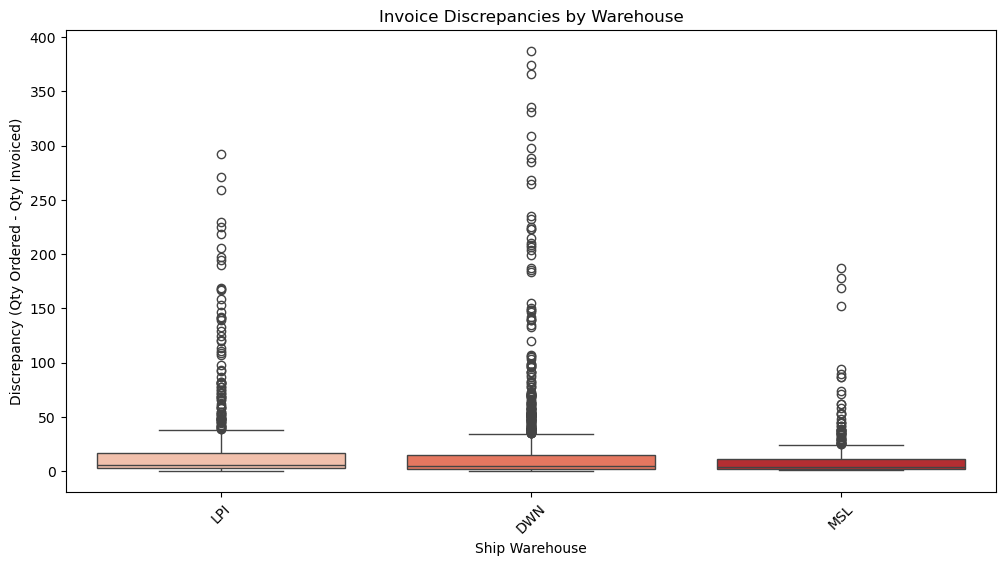

In [55]:
# graph
plt.figure(figsize=(12, 6))
sns.boxplot(x="Ship Warehouse", y="Invoice Discrepancy", data=discrepancies, palette="Reds")
plt.xticks(rotation=45)
plt.title("Invoice Discrepancies by Warehouse")
plt.ylabel("Discrepancy (Qty Ordered - Qty Invoiced)")
plt.show()

In [56]:
##Customer Returns

C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\1878252759.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=returns_analysis, x="Item ID", y="Qty Returned", palette="magma")


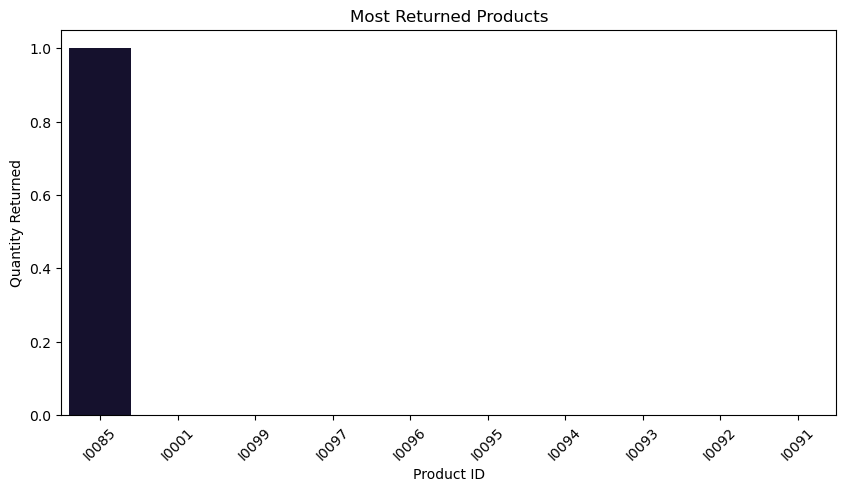

In [57]:
returns_analysis = df.groupby("Item ID")["Qty Returned"].sum().reset_index()
returns_analysis = returns_analysis.sort_values(by="Qty Returned", ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(data=returns_analysis, x="Item ID", y="Qty Returned", palette="magma")
plt.title("Most Returned Products")
plt.xticks(rotation=45)
plt.ylabel("Quantity Returned")
plt.xlabel("Product ID")
plt.show()

In [ ]:
## One order return shows how our product performs, 

In [58]:
##Customer Preffered shipping method

C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\3501834168.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_preference.index, y=shipping_preference.values, palette="coolwarm")


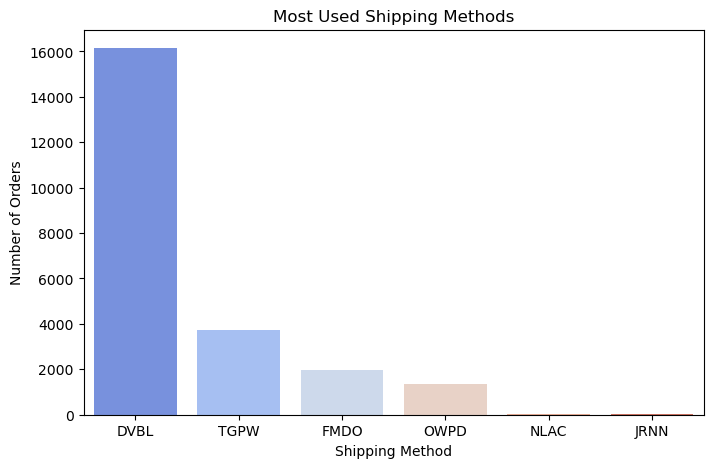

In [59]:
shipping_preference = df["Ship Code"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=shipping_preference.index, y=shipping_preference.values, palette="coolwarm")
plt.title("Most Used Shipping Methods")
plt.xlabel("Shipping Method")
plt.ylabel("Number of Orders")
plt.show()


In [ ]:
## Customers preferrinf DVBL the most, company shoukd imoprove other shipping methods by ensuring timely deliveries and optimising delivering 

C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\2670076480.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])
C:\Users\lnith\AppData\Local\Temp\ipykernel_4004\2670076480.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year-Month'] = df['Order Date'].dt.to_period('M')


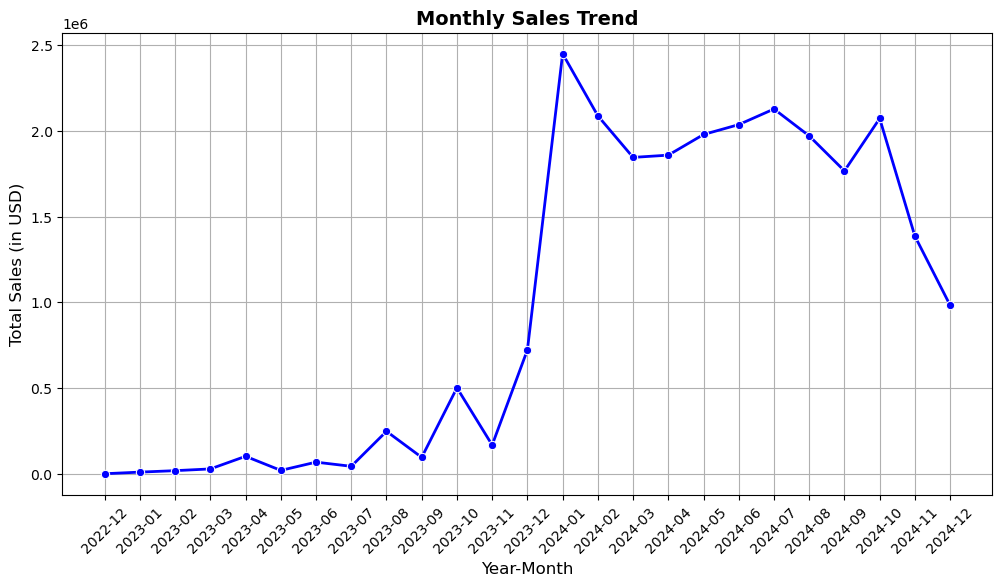

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with actual file path if needed)


# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract Year and Month
df['Year-Month'] = df['Order Date'].dt.to_period('M')

# Aggregate sales by Year-Month
monthly_sales = df.groupby('Year-Month')['Total Price'].sum().reset_index()

# Convert 'Year-Month' back to string for plotting
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].astype(str)

# Plot sales trend
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Year-Month', y='Total Price', marker='o', linewidth=2, color='b')

plt.xticks(rotation=45)
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Sales (in USD)', fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
## Conclusion: The company performs well in sales and pricing, the major thing to focus on is logistic support and warehouse inventory management. 
## Data-Driven Insights: Leverage sales analytics to identify trends and optimize pricing strategies.
##